Assignment 6: Unsupervised Learning (k-Means Clustering)\
Submitted by Group 5 \

Groupmembers:

1. Sajan Kumer Sarker (2111131642) (sajan.sarker@northsouth.edu)
2. Rafsan Jani Chowdhury (2011424642) (rafsan.chowdhury@northsouth.edu)
3. Rosely Mohammad (2014219642) (rosely.mohammad@northsouth.edu)

In [31]:
import numpy as np
import matplotlib.pyplot as plt

*****
# K-means Functions

In [32]:
# randomly initialize cluster centroids
def initialize_centroids(X, k):
  return X[np.random.choice(X.shape[0], size=k, replace=False)]

In [33]:
# Assign data point to the nearest cluster centroid
def assign_clusters(X, centroids):
  distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
  return np.argmin(distances, axis=0)

In [34]:
# move cluster centroids
def move_centroids(X, labels, k):
  centroids = np.zeros((k, X.shape[1]))

  for i in range(k):
    points = X[labels == i]

    if len(points) > 0:
      centroids[i] = points.mean(axis=0)
  return centroids

In [35]:
# cost function
def kmeans_cost(X, centroids, labels):
  cost = 0
  m = len(X)
  for i in range(len(X)):
    cost += np.linalg.norm(X[i] - centroids[labels[i]])**2

  cost = (1/m)*cost
  return cost

In [36]:
# k-means algorithm
def kmeans(X, k):
  max_iters=100
  tol=1e-4
  costs = []
  centroids = initialize_centroids(X, k)

  for iter in range(max_iters):
    labels = assign_clusters(X, centroids)
    cost = kmeans_cost(X, centroids, labels)
    costs.append(cost)

    new_centroids = move_centroids(X, labels, k)
    if np.all(np.abs(new_centroids - centroids) < tol):       # Check for convergence
      break

    centroids = new_centroids
  return centroids, labels, iter , costs    # c(m), µ(k)

In [37]:
# for n-dimention
def run_kmeans(X, k):
  n = 100
  best_cost = float('inf')
  best_centroids = None
  best_labels = None
  best_costs = None

  for i in range(n):
    centroids, labels, iter , costs = kmeans(X, k)
    final_cost = costs[-1]

    if final_cost < best_cost:    # only updated if a better initial point is found (as cost will be lower)
      best_cost = final_cost
      best_centroids = centroids
      best_labels = labels
      best_costs = costs
      best_iter = iter

  return best_centroids, best_labels, best_costs, best_iter

In [38]:
# cost vs k graph for choosing the value of k
def cost_vs_k(X):
  total_cost = []

  for k in range(1,11):
    centroids, labels, _, _ = kmeans(X, k)
    cost = kmeans_cost(X, centroids, labels)
    total_cost.append(cost)

  plt.plot(total_cost)
  plt.title('Cost vs No. of Clusters(K)')
  plt.xlabel('No. of Clusters(K)')
  plt.ylabel('Cost')
  plt.xticks(range(len(total_cost)))
  plt.show()

*****
# K-means on 2d Data

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]

The shape of X is: (300, 2)


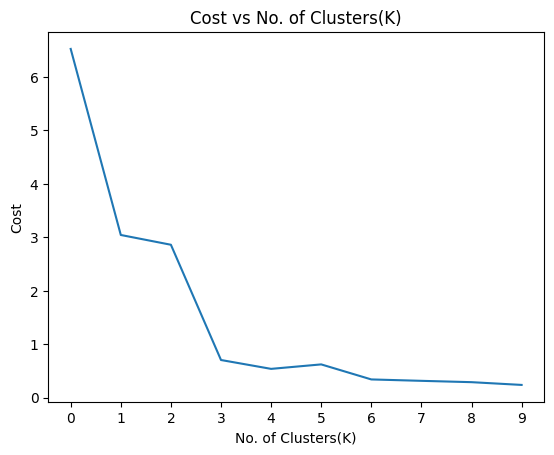

In [39]:
X = np.load("kmeans2d.npy")

print("First five elements of X are:\n", X[:5])
print('\nThe shape of X is:', X.shape)

cost_vs_k(X)

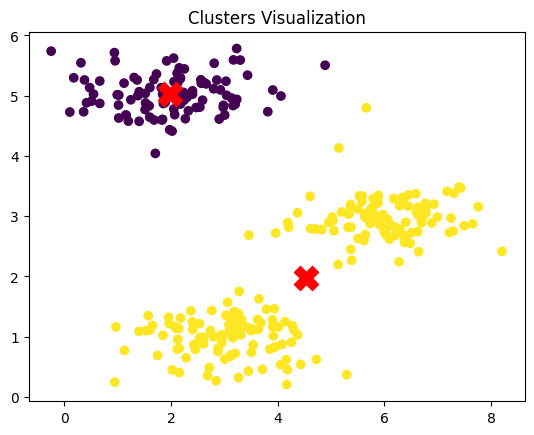

In [40]:
#Running K-Means for k = 2
k = 2
best_centroids, best_labels, costs, iter = run_kmeans(X, k)  #Find Best Centroid from 100 Random runs

plt.scatter(X[:, 0], X[:, 1], c=best_labels, cmap='viridis', marker='o')
plt.scatter(best_centroids[:, 0], best_centroids[:, 1], s=300, c='red', marker='X')
plt.title('Clusters Visualization')
plt.show()

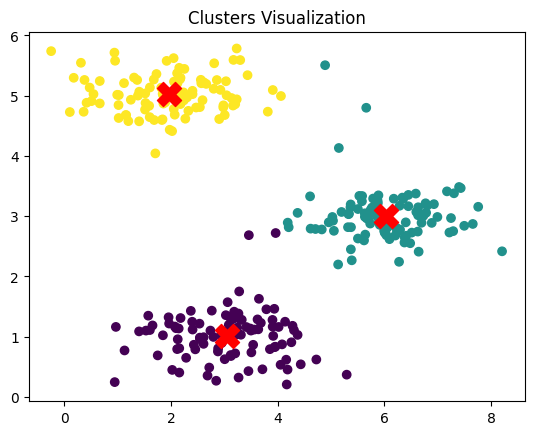

In [41]:
#Running K-Means for k = 3
k = 3
best_centroids, best_labels, costs, iter = run_kmeans(X, k)  #Find Best Centroid from 100 Random runs

plt.scatter(X[:, 0], X[:, 1], c=best_labels, cmap='viridis', marker='o')
plt.scatter(best_centroids[:, 0], best_centroids[:, 1], s=300, c='red', marker='X')
plt.title('Clusters Visualization')
plt.show()

*****
# Image Compression using K-Means

Shape of original_img is: (128, 128, 3)


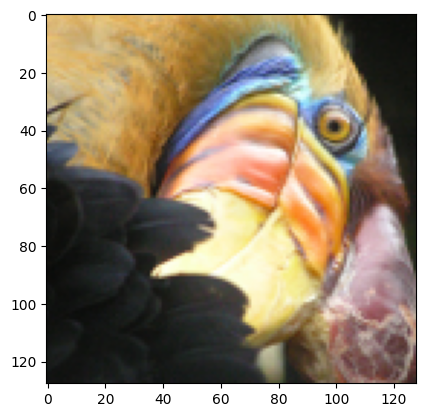

In [42]:
original_img = plt.imread('/content/bird_small.png')
plt.imshow(original_img)
print("Shape of original_img is:", original_img.shape)

In [43]:
# Divide by 255 so that all values are in the range 0 - 1
original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))
X_img.shape

(16384, 3)

In [44]:
K_img = 32 # 4 8 16
centroids, labels, iter, costs = run_kmeans(X_img, K_img)

print('Cluster_center', centroids.shape)
print('Clusters:', K_img)
print('Labels', labels.shape)
print("Iterations: ", len(iter))
X_recovered = centroids[labels,:]
X_recovered = np.reshape(X_recovered, original_img.shape)

Cluster_center (32, 3)
Clusters: 32
Labels (16384,)
Iterations:  7


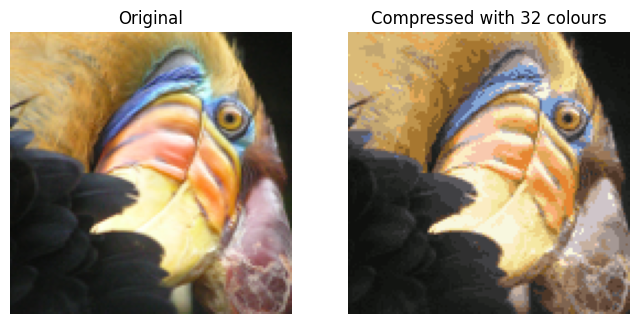

In [45]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()

# Display compressed image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K_img)
ax[1].set_axis_off()